In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# 全局配置plot参数
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = (12.0, 12.0)
plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}']
plt.rcParams['animation.html'] = 'jshtml'
plt.rcParams['axes.labelsize'] = 16

为了更好理解, 这里举一个例子: 向湖水里扔石头, 每扔一次湖水就会激起水波, 假设这个水波慢慢
振幅减小且3秒后变为0.如果我每3秒中扔一个石头, 看到现象就是水波周期性(波的高度慢慢变小)振动,
如果1秒中扔一个石头, 看到的现象是(线性)叠加后的效果.

卷积公式: $y(t)=\int_{-\infty}^{+\infty}{h(t-\lambda)\cdot f(\lambda)\cdot d\lambda}$

In [4]:
ts = np.linspace(-1, 9, 50)

def f_impulse(lam):
    if (lam < 0):
        return 0 
    return 1

def h_response(lam):
    if (lam < 0 or lam > 3):
        return 0
    return round(-1*lam/3+1, 3)

def line_sum(fs, hses):
    return sum(fs * hses)

In [5]:
fs = np.array([f_impulse(i) for i in ts])
hs = np.array([h_response(i) for i in ts])

Text(-30, -50, '$h(\\lambda)$')

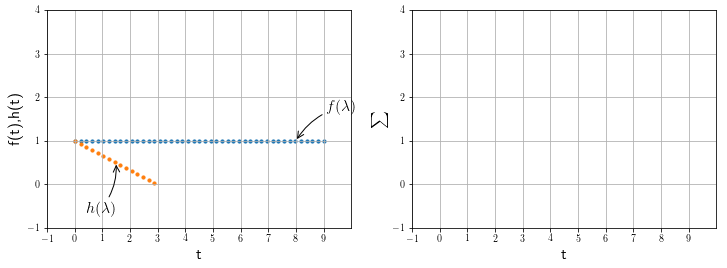

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].set_xlabel('t')
axes[0].set_ylabel('f(t),h(t)')
axes[0].set_xlim([-1, 10])
axes[0].set_ylim([-1, 4])
axes[0].set_xticks(np.linspace(-1, 9, 11, dtype=np.int))
axes[0].set_yticks(np.linspace(-1, 4, 6, dtype=np.int))
axes[0].grid(True)

axes[1].set_xlabel('t')
axes[1].set_ylabel(r'$\sum$')
axes[1].set_xlim([-1, 10])
axes[1].set_ylim([-1, 4])
axes[1].set_xticks(np.linspace(-1, 9, 11, dtype=np.int))
axes[1].set_yticks(np.linspace(-1, 4, 6, dtype=np.int))
axes[1].grid(True)

mask = fs > 0
axes[0].scatter(ts[mask], fs[mask], s=10)
mask = hs > 0
axes[0].scatter(ts[mask], hs[mask], s=10)

axes[0].annotate(r'$f(\lambda)$', xy = (8, 1), xycoords = 'data',
             xytext = (30, 30), textcoords = 'offset points',
             fontsize = 16, arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3, rad = .2'))

axes[0].annotate(r'$h(\lambda)$', xy = (1.5, 0.5), xycoords = 'data',
             xytext = (-30, -50), textcoords = 'offset points',
             fontsize = 16, arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3, rad = .2'))

## 叠加效应

移动$h(\lambda)$, 分别在第3,6秒, 投放相同大小的石头$f(\lambda) = 1$, 石头大小为1, 从下图看并没有叠加效应

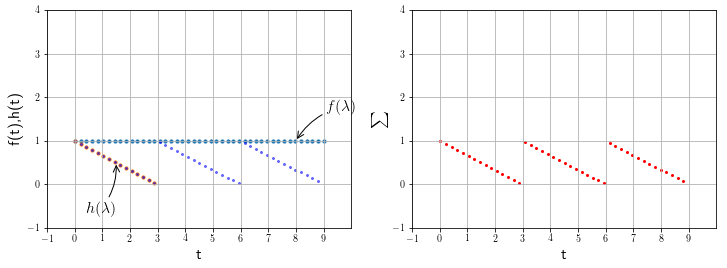

In [7]:
hses = [np.array([h_response(i-j) for i in ts]) for j in (0, 3, 6)]
scaes = []
for hs in hses:
    mask = hs > 0
    scaes.append(axes[0].scatter(ts[mask], hs[mask], s=4, color='blue', alpha=0.5))
    
ys = line_sum(fs, hses)
mask = ys > 0
axes[1].scatter(ts[mask], ys[mask], s=4, color="red")
fig

在第0秒投放一个石头, 在未来第3秒和第6秒均不在有效应, 并且第1,2秒没有投放石头

1.未来的第3秒y(3)

t = 0投放的时候3秒后(未来第3秒)为0  
t = 1没有投放, 未来第3秒为0  
t = 2没有投放, 未来第3秒为0  

所以 t = 3时投放的效应为f(3)h(0) = 1
 
2.未来的第6秒y(6)

同上

In [8]:
# 删除axes[1]图里的数据
for item in axes[1].collections :
    item.remove()
del axes[1].collections[:]

# 隐藏axes[0]里面散点图的数据
for sca in scaes:
    sca.set_visible(False)

移动$h(\lambda)$, 分别在第1,2,3,4,5秒, 投放相同大小的石头$f(\lambda) = 1$, 石头大小为1, 从下图看当水波振幅下降过程中(1秒), 又扔了一块同等大小的石头, 前一个石头的效应还没有结束, 效果叠加.

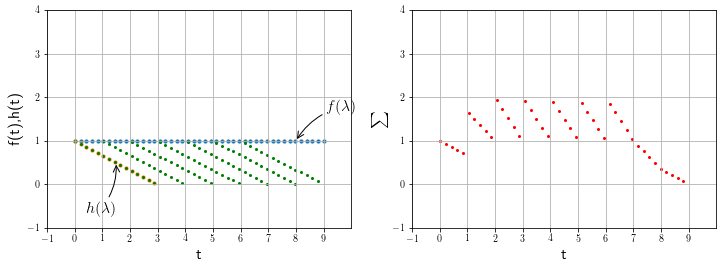

In [9]:
hses = [np.array([h_response(i-j) for i in ts]) for j in range(0, 7)]
for hs in hses:
    mask = hs > 0
    axes[0].scatter(ts[mask], hs[mask], s=4, color='green')
    
ys = line_sum(fs, hses)
mask = ys > 0
axes[1].scatter(ts[mask], ys[mask], s=4, color="red")
fig

如果扔石头的更频繁, 从下图可以看出, 最终的y(t)效果趋于稳定在一个值上.

分析未来第4秒的情况(其他类似):
    
t=0点对未来第4秒: f(0)*h(4-0) = f(0)*h(4) = 0   
t=1点对未来第4秒: f(1)*h(4-1) = f(2)*h(3) = 0  
t=2点对未来第4秒: f(2)*h(4-2) = f(2)*h(2) = 1/3  
t=3点对未来第4秒: f(3)*h(4-3) = f(3)*h(1) = 2/3  
t=4点对未来第4秒: f(4)*h(4-4) = f(4)*h(0) = 1 (就是当前)  

所有总效应:


$
\begin{align*}
y(4) &= f(4)*h(4-4) + f(3)*h(4-3) + f(2)*h(4-2) + f(1)*h(4-1) + f(0)h(4-0) \\
     &= 1 + 2/3 + 1/3 + 0 + 0 \\
     &= 2
\end{align*}
$


**从上面的计算推导, 可以隐约看到180翻转的来由**.

-----------------------------------------------------------------------

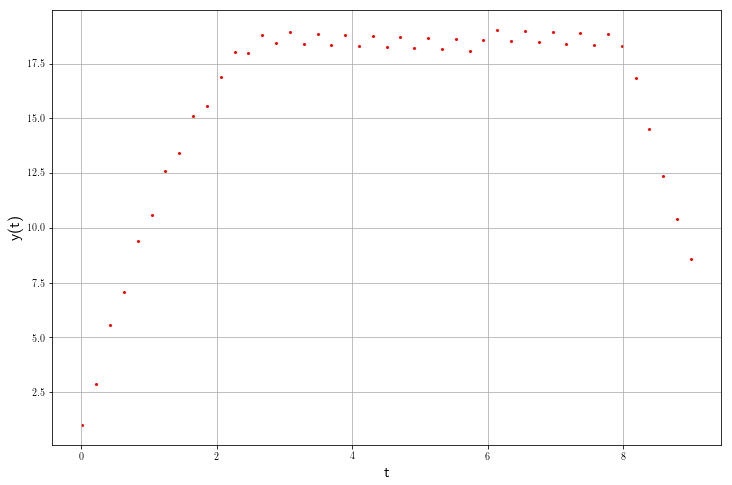

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax.set_xlabel('t')
ax.set_ylabel('y(t)')
ax.grid(True)

hses = [np.array([h_response(i-j) for i in ts]) for j in np.linspace(0, 8, 100)]
ys = line_sum(fs, hses)
mask = ys > 0
ax.scatter(ts[mask], ys[mask], s=4, color="red")

## 数学积分

当扔石头非常非常密集的时候, 就需要积分计算

$f(\lambda)$表示扔石头(刺激), $h(\lambda)$表示水波振幅(响应)

$
f(\lambda) = 1
$


$
h(\lambda) = \left\{\begin{matrix}
0 &, & \lambda < 0\\ 
-\dfrac{1}{3}\lambda +1 &, & 0 \leq \lambda \leq 3\\ 
0 &, & \lambda > 3
\end{matrix}\right.
$

-----------------------------------------------------

$y(t)=\int_{-\infty}^{+\infty}{h(t-\lambda)\cdot f(\lambda)\cdot d\lambda}$

当t < 0:

$y(t) = \int\limits_{-\infty}^{0}f(\lambda)h(t-\lambda)d\lambda = \int\limits_{-\infty}^{0}0d\lambda = 0$

当0 < t < 3:

$ \begin{align*}
y(t) &= \int\limits_{0}^{t}f(\lambda)h(t-\lambda)d\lambda \\ 
 &= \int\limits_{0}^{t}\left(1-\dfrac{1}{3}(t-\lambda)\right)d\lambda \\ 
 &= \left( {\lambda - \dfrac{1}{3}(t\lambda - \dfrac{\lambda^2}{2}}\right)\bigg|_{0}^{t}\\
 &= t - \dfrac{1}{6}t^2
\end{align*}
$

当t > 3:

$y(t) = \int\limits_{3}^{+\infty}f(\lambda)h(t-\lambda)d\lambda = \int\limits_{-\infty}^{0}0d\lambda = 0$

综上:

$ 
\begin{align*}
y(t) &= \int\limits_{-\infty}^{+\infty}f(\lambda)h(t-\lambda)d\lambda \\ 
 &= \int\limits_{-\infty}^{0}f(\lambda)h(t-\lambda)d\lambda + \int\limits_{0}^{3}f(\lambda)h(t-\lambda)d\lambda + \int\limits_{3}^{+\infty}f(\lambda)h(t-\lambda)d\lambda \\ 
\end{align*}
$

$
y(t) = \left\{\begin{matrix}
0 &, & t < 0\\ 
t - \dfrac{1}{6}t^2 &, & 0 \leq t \leq 3\\ 
3 - \dfrac{1}{6}3^2 &, & t > 3
\end{matrix}\right.
$

---------------------------------------------------

## 继续用离散数据和图形描述

$y(t) = \sum\limits_{i = 0}^\infty {\left( {f\left( {i \cdot \Delta T} \right) \cdot \Delta T} \right)}
          \cdot h\left( {t - i \cdot \Delta T} \right)$

(未完, 待补充)